<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras Syntax Basics

With TensorFlow 2.0 , Keras is now the main API choice. Let's work through a simple regression project to understand the basics of the Keras syntax and adding layers.

## The Data

To learn the basic syntax of Keras, we will use a very simple fake data set, in the subsequent lectures we will focus on real datasets, along with feature engineering! For now, let's focus on the syntax of TensorFlow 2.0.

Let's pretend this data are measurements of some rare gem stones, with 2 measurement features and a sale price. Our final goal would be to try to predict the sale price of a new gem stone we just mined from the ground, in order to try to set a fair price in the market.

### Load the Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../DATA/fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


### Explore the data

Let's take a quick look, we should see strong correlation between the features and the "price" of this made up product.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


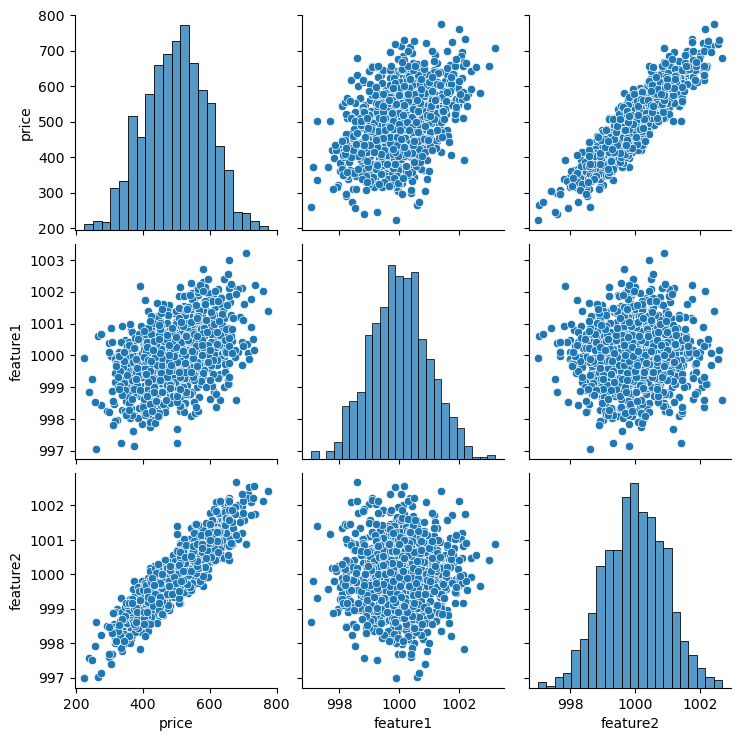

In [5]:
sns.pairplot(df)

Feel free to visualize more, but this data is fake, so we will focus on feature engineering and exploratory data analysis later on in the course in much more detail!

### Test/Train Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Convert Pandas to Numpy for Keras

# Features
X = df[['feature1','feature2']].values

# Label
y = df['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [8]:
X_train.shape

(700, 2)

In [9]:
X_test.shape

(300, 2)

In [10]:
y_train.shape

(700,)

In [11]:
y_test.shape

(300,)

## Normalizing/Scaling the Data

We scale the feature data.

[Why we don't need to scale the label](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
#help(MinMaxScaler)

In [15]:
scaler = MinMaxScaler()

In [15]:
# Notice to prevent data leakage from the test set, we only fit our scaler to the training set

In [16]:
scaler.fit(X_train)

MinMaxScaler()

In [17]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# TensorFlow 2.0 Syntax


## Import Options

There are several ways you can import Keras from Tensorflow (this is hugely a personal style choice, please use any import methods you prefer). We will use the method shown in the **official TF documentation**.

In [18]:
import tensorflow as tf

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
help(Sequential)

Help on class Sequential in module keras.src.models.sequential:

class Sequential(keras.src.models.model.Model)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `Model`.
 |  
 |  Examples:
 |  
 |  ```python
 |  model = keras.Sequential()
 |  model.add(keras.Input(shape=(16,)))
 |  model.add(keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the initial `Input`.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = keras.Sequential()
 |  model.add(keras.layers.Dense(8))
 |  model.add(keras.layers.Dense(4))
 |  # model.weights not created yet
 |  
 |  # Whereas if you specify an `Input`, the model gets built
 |  # continuously as you are adding layers:
 |  model = keras.Sequential()
 |  model.add(keras.Input(shape=(16,)))
 |  model.add(keras.layers.Dense(8))
 |  len(model.weights)  # Returns "2"
 |  
 |  # When using the delayed-build 

## Creating a Model

There are two ways to create models through the TF 2 Keras API, either pass in a list of layers all at once, or add them one by one.

Let's show both methods (its up to you to choose which method you prefer).

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

### Model - as a list of layers

In [22]:
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])

### Model - adding in layers one by one

In [23]:
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

Let's go ahead and build a simple model and then compile it by defining our solver

In [24]:
model = Sequential()

# More easy to delete a line 
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [25]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - loss: 252026.2656
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 254256.9844
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - loss: 260797.6250
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 252276.6719
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - loss: 256187.0312
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - loss: 257068.3125
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - loss: 257170.1094
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 256424.4219 
Epoch 9/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - loss: 254901.8438
Epoch 10/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - loss: 252267.9219
Epoch 11/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 258424.3281
Epoch 12/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 249812.7500
Epoch 13/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - loss: 253878.4844
Epoch 14/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 325us

## Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

In [26]:
model.history.history

{'loss': [256742.359375,
  256556.0,
  256347.21875,
  256128.203125,
  255898.234375,
  255662.109375,
  255425.1875,
  255184.34375,
  254930.359375,
  254657.28125,
  254363.5,
  254041.84375,
  253693.765625,
  253316.828125,
  252908.828125,
  252468.109375,
  251992.796875,
  251480.5,
  250931.6875,
  250341.984375,
  249709.640625,
  249033.578125,
  248314.15625,
  247548.546875,
  246730.15625,
  245862.578125,
  244942.875,
  243964.484375,
  242928.015625,
  241836.453125,
  240684.75,
  239472.203125,
  238185.28125,
  236834.359375,
  235420.109375,
  233936.53125,
  232375.453125,
  230745.578125,
  229040.640625,
  227253.828125,
  225379.9375,
  223428.25,
  221389.84375,
  219270.078125,
  217078.375,
  214779.65625,
  212397.25,
  209939.515625,
  207365.59375,
  204713.390625,
  201974.71875,
  199133.8125,
  196201.125,
  193177.46875,
  190050.078125,
  186848.75,
  183552.6875,
  180134.28125,
  176637.21875,
  173030.84375,
  169356.65625,
  165600.875,
  161732

In [27]:
loss = model.history.history['loss']

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


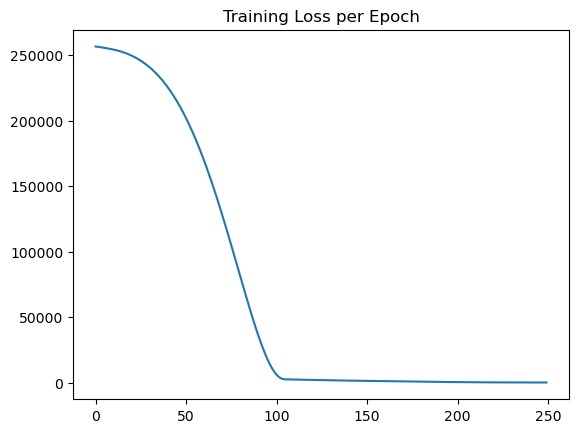

In [28]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

### Compare final evaluation (MSE) on training set and test set.

These should hopefully be fairly close to each other.

In [29]:
model.metrics_names

['loss']

In [30]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [31]:
training_score

25.484447479248047

In [32]:
test_score

26.741119384765625

### Further Evaluations

In [33]:
test_predictions = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [34]:
test_predictions

array([[407.04443],
       [622.63385],
       [591.42285],
       [572.37054],
       [369.6551 ],
       [578.93555],
       [516.2591 ],
       [459.8876 ],
       [549.6551 ],
       [448.37665],
       [611.00336],
       [548.1446 ],
       [420.74792],
       [410.77066],
       [649.15216],
       [438.4353 ],
       [508.2776 ],
       [659.27673],
       [661.4999 ],
       [565.0156 ],
       [337.26596],
       [446.15692],
       [384.86642],
       [380.79703],
       [566.44086],
       [610.2701 ],
       [532.71704],
       [429.26352],
       [654.63074],
       [415.41107],
       [443.6231 ],
       [485.90665],
       [439.7048 ],
       [680.60077],
       [425.74542],
       [419.63354],
       [501.63675],
       [550.3938 ],
       [510.8414 ],
       [398.00476],
       [617.5676 ],
       [418.0082 ],
       [603.62823],
       [446.6442 ],
       [502.58075],
       [580.43665],
       [666.88916],
       [490.8042 ],
       [321.02264],
       [486.28302],


In [35]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [36]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [37]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [38]:
test_predictions

0      407.044434
1      622.633850
2      591.422852
3      572.370544
4      369.655090
          ...    
295    529.653625
296    517.070984
297    608.823059
298    418.185699
299    412.873505
Length: 300, dtype: float32

In [39]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [40]:
pred_df.columns = ['Test Y','Model Predictions']

In [41]:
pred_df

,Test Y,Model Predictions
0,402.296319,407.044434
1,624.156198,622.633850
2,582.455066,591.422852
3,578.588606,572.370544
4,371.224104,369.655090
...,...,...
295,525.704657,529.653625
296,502.909473,517.070984
297,612.727910,608.823059
298,417.569725,418.185699


Let's compare to the real test labels!

<Axes: xlabel='Test Y', ylabel='Model Predictions'>

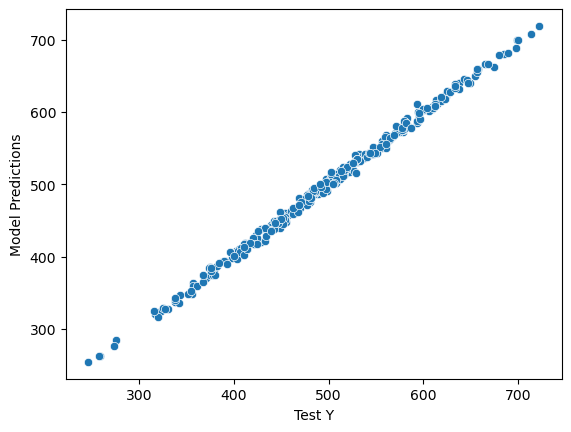

In [42]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [43]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

/var/folders/sp/5gdxt9_x4c50nv0d_qxgpl3m0000gn/T/ipykernel_77940/1356567216.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_df['Error'],bins=50)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Error', ylabel='Density'>

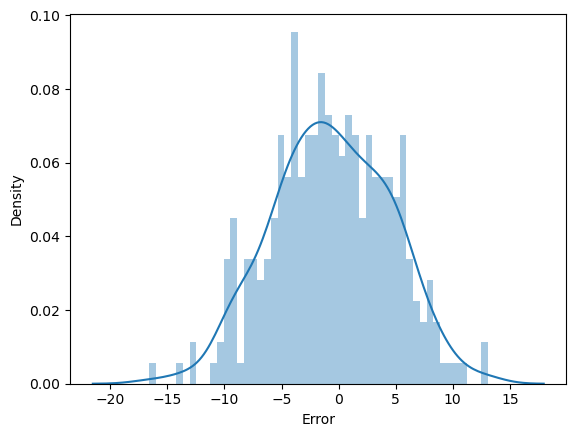

In [44]:
sns.distplot(pred_df['Error'],bins=50)

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [46]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

4.206303994296795

In [47]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

26.74112386694005

In [48]:
# Essentially the same thing, difference just due to precision
test_score

26.741119384765625

In [49]:
#RMSE
test_score**0.5

5.17118162364905

# Predicting on brand new data

What if we just saw a brand new gemstone from the ground? What should we price it at? This is the **exact** same procedure as predicting on a new test data!

In [50]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [51]:
# Don't forget to scale!
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [52]:
new_gem = scaler.transform(new_gem)

In [53]:
model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([[422.02084]], dtype=float32)

## Saving and Loading a Model

In [54]:
from tensorflow.keras.models import load_model

In [55]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [58]:
later_model = load_model('my_model.h5') 

TypeError: Could not locate function 'mse'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'keras.metrics', 'class_name': 'function', 'config': 'mse', 'registered_name': 'mse'}

In [57]:
later_model.predict(new_gem)

NameError: name 'later_model' is not defined